In [1]:
%matplotlib inline
from d2l import mxnet as d2l
from mxnet import autograd, np, npx
import random
npx.set_np()

In [4]:
def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise"""
    X = np.random.normal(0, 1, (num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(0, 0.01, y.shape)
    
    return X, y.reshape((-1, 1))

In [5]:
true_w = np.array([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [7]:
print("Features: ", features[1], "\nlabel: ", labels[1])

Features:  [0.4838046 0.7740038] 
label:  [2.5281289]


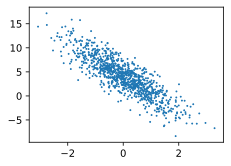

In [9]:
d2l.set_figsize()
d2l.plt.scatter(d2l.numpy(features[:, 1]), d2l.numpy(labels), 1);

In [19]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    
    random.shuffle(indices)
    
    for i in range(0, num_examples, batch_size):
        batch_indices = np.array(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

### Initialize Model Parameters

In [11]:
w = np.random.normal(0, 0.01, (2, 1))
b = np.zeros(1)
w.attach_grad()
b.attach_grad()

In [12]:
def linreg(X, w, b):
    """The linear regression model"""
    return np.dot(X, w) + b

In [13]:
def squared_loss(y_hat, y):
    """Squared loss"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [14]:
def sgd(params, lr, batch_size):
    """Minibatch stochastic gradient descent"""
    for param in params:
        param[:] = param - lr * param.grad / batch_size

### Training

In [17]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss
batch_size = 10

In [20]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f"epoch {epoch + 1}, loss {float(train_l.mean()):f}")

epoch 1, loss 0.050320
epoch 2, loss 0.000214
epoch 3, loss 0.000051


In [22]:
print(f"error in estimating w: {true_w - w.reshape(true_w.shape)}")
print(f"error in estimating b: {true_b - b}")

error in estimating w: [ 0.00096405 -0.00035071]
error in estimating b: [0.00089931]
